# Beta Sigma Examples
https://pyastronomy.readthedocs.io/en/latest/pyaslDoc/aslDoc/estimateSNR.html


In [1]:
from __future__ import print_function
from PyAstronomy import pyasl
import numpy as np

# Set up artificial data set
x = np.linspace(0., 1., 200)
y = 10.2 + x + 4 * x**2
# Add some independent, Gaussian noise
gstd = 0.1
y += np.random.normal(0., gstd, len(x))

# Estimate noise using robust estimate
beq = pyasl.BSEqSamp()
# Define order of approximation (use larger values such as 2,3, or 4 for
# faster varying or less well sampled data sets; also 0 is a valid order)
N = 1
# Define 'jump parameter' (use larger values such as 2,3, or 4 if correlation
# between adjacent data point is suspected)
j = 1
# Estimate noise assuming equidistant sampling (often a good approximation even
# if data are not strictly equidistant) and robust estimation (often advantageous
# in working with real data)
nstd, nstdstd = beq.betaSigma(y, N, j, returnMAD=True)

print("Input noise std: ", gstd)
print("Estimated noise std = %5.3f +/- %5.3f" % (nstd, nstdstd))


Input noise std:  0.1
Estimated noise std = 0.094 +/- 0.011


## Noise estimates with different orders of approximations (N)

Maximum absolute difference between consecutive
    values of g(t):  0.25270029930212146
Input standard deviation:  0.02
Number of 'data points':  200

Order of approximation (N):  0
    Size of beta sample:  199
    Robust estimate of noise std:  0.066 +/-  0.007
Order of approximation (N):  1
    Size of beta sample:  198
    Robust estimate of noise std:  0.018 +/-  0.002
Order of approximation (N):  2
    Size of beta sample:  197
    Robust estimate of noise std:  0.019 +/-  0.002
Order of approximation (N):  3
    Size of beta sample:  196
    Robust estimate of noise std:  0.019 +/-  0.002


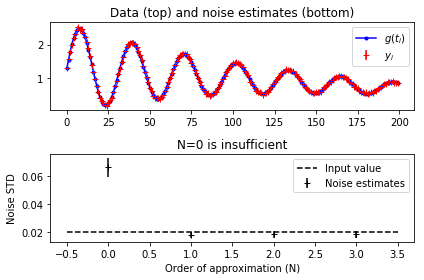

In [2]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pylab as plt
from PyAstronomy import pyasl

def g(t):
    """
    Function determining the behavior of the data.
    """
    return 1.3 - 0.003*t + 1.3*np.sin(t/5.) * np.exp(-t/100.)


# Number of data points
nd = 200

ti = np.arange(float(nd))
gi = g(ti)

mdiff = np.max(np.abs(gi[1:] - gi[0:-1]))
print("""Maximum absolute difference between consecutive
    values of g(t): """, mdiff)

# Standard deviation of noise
istd = 0.02

print("Input standard deviation: ", istd)
print("Number of 'data points': ", nd)
print()

# Add Gaussian noise to data
yi = gi + np.random.normal(0.0, istd, nd)

# Create class instance for equidistant sampling
bseq = pyasl.BSEqSamp()

# Specify jump parameter (j) for construction of beta sample
j = 1

# Order of approximation to use
Ns = [0,1,2,3]

# Use to store noise estimates
smads, dsmads = [], []

# Loop over orders of approximation between 0 and 3
for N in Ns:

    # Get estimates of standard deviation based on robust (MAD-based) estimator
    smad, dsmad = bseq.betaSigma(yi, N, j, returnMAD=True)
    print("Order of approximation (N): ", N)

    print("    Size of beta sample: ", len(bseq.betaSample))
    print("    Robust estimate of noise std: %6.3f +/- %6.3f" % (smad, dsmad))
    # Save result
    smads.append(smad)
    dsmads.append(dsmad)

# Plot g(t) and the synthetic data
plt.subplot(2,1,1)
plt.title("Data (top) and noise estimates (bottom)")
plt.plot(ti, gi, 'b.-', label="$g(t_i)$")
plt.errorbar(ti, yi, yerr=np.ones(nd)*istd, fmt='r+', label="$y_i$")
plt.legend()
plt.subplot(2,1,2)
plt.title("N=0 is insufficient")
plt.errorbar(Ns, smads, yerr=dsmads, fmt='k+', label="Noise estimates")
plt.plot([min(Ns)-0.5, max(Ns)+0.5], [istd]*2, 'k--', label="Input value")
plt.legend()
plt.xlabel("Order of approximation (N)")
plt.ylabel("Noise STD")
plt.tight_layout()
plt.show()

## The effect of outliers: A case for robust estimation

Order of approximation:  0
Jump parameter:  1

Input standard deviation:  0.2
Number of 'data points':  200
Size of beta sample:  199

Minimum-variance estimate: 14.915 +/-  0.916
Robust estimate:  0.227 +/-  0.023


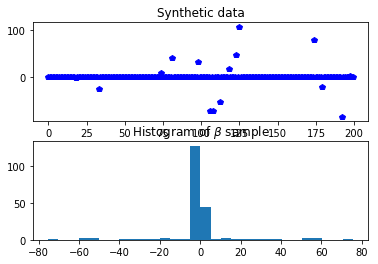

In [3]:
from __future__ import print_function, division
import numpy as np
from PyAstronomy import pyasl
import matplotlib.pylab as plt

# Number of data points
nd = 200

# Input standard deviation
istd = 0.2

# Create some synthetic data (Gaussian noise) with
# input standard deviation.
y = np.random.normal(1.0, istd, nd)

# Introduce some outliers
# Number of outliers
no = 15
for _ in range(no):
    # Choose an index (could occur more than once)
    index = np.random.randint(0, high=nd)
    # Add point from normal distribution with
    # STD of 50
    y[index] = np.random.normal(1.0, 50.0)

# Create class instance for equidistant sampling
bseq = pyasl.BSEqSamp()

# Specify order of approximation (N) and jump parameter (j) for
# construction of beta sample
N = 0
j = 1

print("Order of approximation: ", N)
print("Jump parameter: ", j)
print()

# Get estimates of standard deviation based on MV estimator and ...
smv, dsmv = bseq.betaSigma(y, N, j, returnMAD=False)
# ... robust (MAD-based) estimator
smad, dsmad = bseq.betaSigma(y, N, j, returnMAD=True)

print("Input standard deviation: ", istd)
print("Number of 'data points': ", nd)
print("Size of beta sample: ", len(bseq.betaSample))
print()
print("Minimum-variance estimate: %6.3f +/- %6.3f" % (smv, dsmv))
print("Robust estimate: %6.3f +/- %6.3f" % (smad, dsmad))

plt.subplot(2,1,1)
plt.title("Synthetic data")
plt.plot(y, 'bp')
plt.subplot(2,1,2)
plt.title("Histogram of $\\beta$ sample")
plt.hist(bseq.betaSample, 30)
plt.show()


## Equidistant vs. arbitrary sampling

Input standard deviation:  0.3
Number of 'data points':  30

Estimates for N=1 and j=1
    Equidistant sampling: 0.526 +/- 0.098
    Arbitrary sampling: 0.277 +/- 0.062

Estimates for N=2 and 3 based on equidistant sampling
    N = 2: 0.285 +/- 0.059
    N = 3: 0.291 +/- 0.065


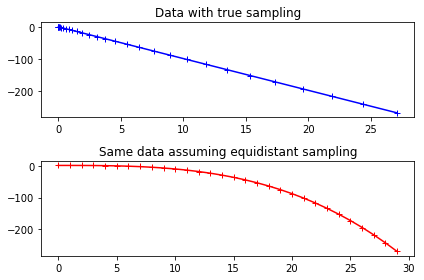

In [4]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pylab as plt
from PyAstronomy import pyasl

def g(t):
    """
    Function determining the behavior of the data.
    """
    return 1.3 - 10.0*t


# Number of data points
nd = 30

# Creating non-equidistant samping axis (ti)
te = np.arange(float(nd))
ti = (te**3) / float(nd**2)

# Get values of g(t)
gi = g(ti)

# Standard deviation of noise
istd = 0.3

# Add Gaussian noise to data
yi = gi + np.random.normal(0.0, istd, nd)

print("Input standard deviation: ", istd)
print("Number of 'data points': ", nd)
print()

# Create class instance for equidistant sampling
bseq = pyasl.BSEqSamp()
# Create class instance for arbitrary sampling
bsar = pyasl.BSArbSamp()

# Get estimates assung equidistant and arbitrary sampling
# using N = 1 and j = 1. From the definition of g(t), N = 1
# will be sufficient for the case of arbitrary sampling, but
# not necessarily for (assumed) equidistant sampling.
smv_es, dsmv_es  = bseq.betaSigma(yi, 1, 1)
smv_as, dsmv_as  = bsar.betaSigma(ti, yi, 1, 1)

print("Estimates for N=1 and j=1")
print("    Equidistant sampling: %5.3f +/- %5.3f" % (smv_es, dsmv_es))
print("    Arbitrary sampling: %5.3f +/- %5.3f" % (smv_as, dsmv_as))
print()

# Get estimates for N=2 and 3 assuming equidistant sampling
smv_es2, dsmv_es2  = bseq.betaSigma(yi, 2, 1)
smv_es3, dsmv_es3  = bseq.betaSigma(yi, 3, 1)

print("Estimates for N=2 and 3 based on equidistant sampling")
print("    N = 2: %5.3f +/- %5.3f" % (smv_es2, dsmv_es2))
print("    N = 3: %5.3f +/- %5.3f" % (smv_es3, dsmv_es3))

plt.subplot(2,1,1)
plt.title("Data with true sampling")
plt.plot(ti, gi, 'b-')
plt.errorbar(ti, yi, yerr=np.ones(nd)*istd, fmt='b+')
plt.subplot(2,1,2)
plt.title("Same data assuming equidistant sampling")
plt.plot(te, gi, 'r-')
plt.errorbar(te, yi, yerr=np.ones(nd)*istd, fmt='r+')
plt.tight_layout()
plt.show()